In [1]:
import pandas as pd
from keras.callbacks import ModelCheckpoint  
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers import Input
from keras.models import Sequential, Model
from keras.applications import ResNet50, Xception, VGG16, resnet50, xception, vgg16
from tqdm import tqdm
import numpy as np
from keras.preprocessing import image
from glob2 import glob
import matplotlib.pyplot as plt
from IPython.display import display,Image
import h5py

/home/kevin/.conda/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
datagen = image.ImageDataGenerator(rescale=1/255)

test_generator = datagen.flow_from_directory(
            'data/test',
            target_size=(224,224),
            batch_size=50,
            shuffle=False,
            class_mode=None)

model_resnet50 = ResNet50(weights='models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',include_top=False)
model = Model(model_resnet50.input, model_resnet50.input)
test_data = model.predict_generator(test_generator,10)

Found 12500 images belonging to 1 classes.


In [19]:
test_data.shape

(500, 224, 224, 3)

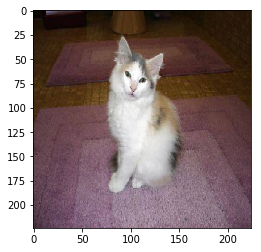

In [6]:
plt.imshow(test_data[1])

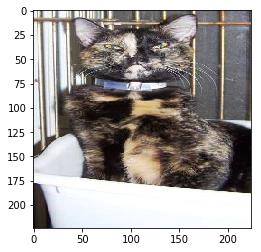

In [10]:
plt.imshow(test_generator.next()[1])

In [11]:
test_generator.filenames

['test/1.jpg',
 'test/10.jpg',
 'test/100.jpg',
 'test/1000.jpg',
 'test/10000.jpg',
 'test/10001.jpg',
 'test/10002.jpg',
 'test/10003.jpg',
 'test/10004.jpg',
 'test/10005.jpg',
 'test/10006.jpg',
 'test/10007.jpg',
 'test/10008.jpg',
 'test/10009.jpg',
 'test/1001.jpg',
 'test/10010.jpg',
 'test/10011.jpg',
 'test/10012.jpg',
 'test/10013.jpg',
 'test/10014.jpg',
 'test/10015.jpg',
 'test/10016.jpg',
 'test/10017.jpg',
 'test/10018.jpg',
 'test/10019.jpg',
 'test/1002.jpg',
 'test/10020.jpg',
 'test/10021.jpg',
 'test/10022.jpg',
 'test/10023.jpg',
 'test/10024.jpg',
 'test/10025.jpg',
 'test/10026.jpg',
 'test/10027.jpg',
 'test/10028.jpg',
 'test/10029.jpg',
 'test/1003.jpg',
 'test/10030.jpg',
 'test/10031.jpg',
 'test/10032.jpg',
 'test/10033.jpg',
 'test/10034.jpg',
 'test/10035.jpg',
 'test/10036.jpg',
 'test/10037.jpg',
 'test/10038.jpg',
 'test/10039.jpg',
 'test/1004.jpg',
 'test/10040.jpg',
 'test/10041.jpg',
 'test/10042.jpg',
 'test/10043.jpg',
 'test/10044.jpg',
 'test/

digraph G {

    node [shape=record]
    a[label="ResNet50|{input:|output:}|{(224, 224, 3)|(2048)}"]
    b[label="VGG16|{input:|output:}|{(224, 224, 3)|(512)}"]
    c[label="Xception|{input:|output:}|{(299, 299, 3)|(2048)}"]
    Merge[label="numpy.concatenate|{before:|after:}|{(2048), (512), (2048)|(6144)}"]
    Dropout[label="Dropout|Rate:|0.5"]
    Dense[label="Dense|{input:|output:}|{4608|256}"]
    Output[label="Output|{input:|output:}|{(256)|(1)}"]
    Image -> a -> Merge
    Image -> b -> Merge
    Image -> c -> Merge
    Merge -> Dropout -> Dense -> Output
}